Text(0.5, 1, 'reading+writing scores VS math score')

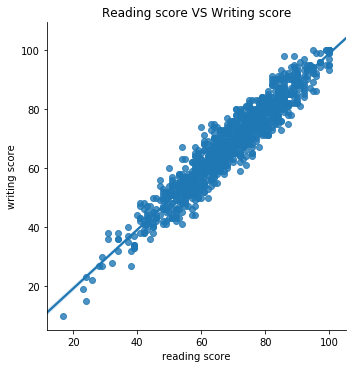

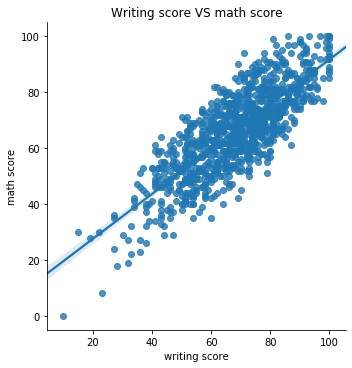

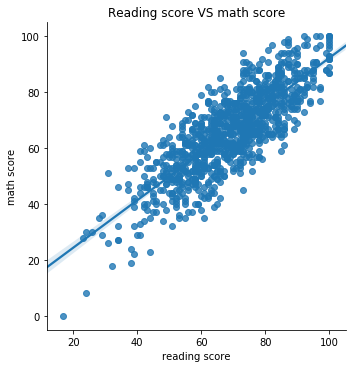

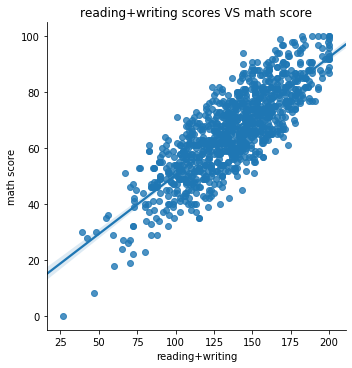

In [322]:
#Homework3
#Q1 Explore whether there are any dependences between reading/writing/math_scores
'''
I decided to separate quastions and find dependency between:
Q1.1Between reading and writing
Q1.2Between writing and math scores
Q1.3Between reading and math scores
Q1.4Between reading+writing and math scores
'''
#Import libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import os
from matplotlib import pyplot as plt
import scipy.stats as sps
student_perform = pd.read_csv("/Users/Lisa/StudentsPerformance (1).csv")
student_perform.tail(5)

#Q1.1 Between reading and writing
scores = [i for i in list(student_perform) if "score" in i]
scores
student_perform[scores]
sns.lmplot(x='reading score', y='writing score', data=student_perform)
plt.title('Reading score VS Writing score')

#Q1.2 Between writing and math scores
sns.lmplot(x='writing score', y='math score', data=student_perform)
plt.title('Writing score VS math score')

#Q1.3 Between reading and math scores
sns.lmplot(x='reading score', y='math score', data=student_perform)
plt.title('Reading score VS math score')

# Between reading+writing and math scores
student_perform['reading+writing'] = student_perform['reading score'] + student_perform['writing score']
sns.lmplot(x='reading+writing', y='math score', data=student_perform)
plt.title('reading+writing scores VS math score')

'''
We can see strongly correlation between reading and writing score 
and can conclude that if person good in writing they will be good in math and reading.
'''



,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


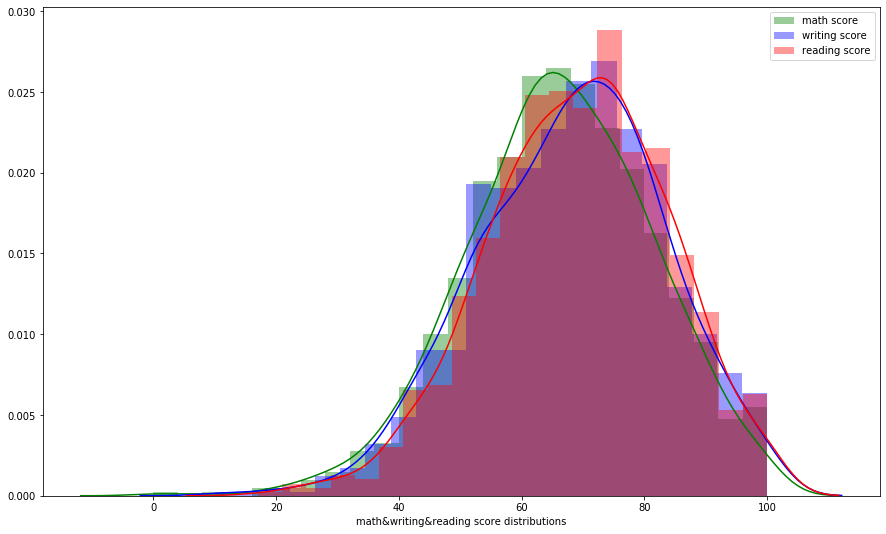

In [394]:
'''
In this case we can try to calculate Pearson correlation, but before it let's check - is our data fit for Pearson correlation.
For Pearson correlation our data need to fit some criterias:
1. Normally distributed samples
2. The test variables are  measured on an interval scale or ratio scale
3. Thesame number of measurments for all variables
'''
#Check distributions 
sns.distplot(student_perform['math score'],color='green',label="math score")
sns.distplot(student_perform['writing score'],color='blue',label="writing score")
sns.distplot(student_perform['reading score'],color='red', label="reading score")
plt.legend()
plt.xlabel('math&writing&reading score distributions')
#Check number of observations
student_perform[scores]




In [132]:
#Perform Pearson correlation
student_perform.corr()
'''
We can see positive correlation (closer to 1) between scores -
if student good in reading and writing he will be good in math.
'''

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


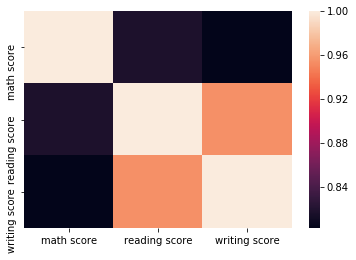

In [130]:
#We can use heatmap to vizualize it
sns.heatmap(student_perform.corr())

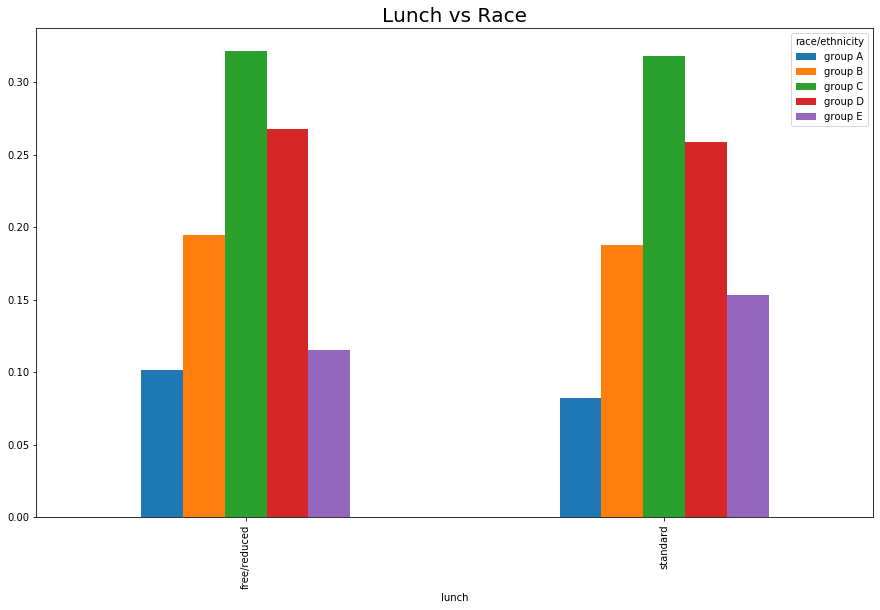

In [405]:
'''
Q2  find out whether student's race or/and paretns' level_of_education influences lunch_type of their children
Q2.1 find out whether student's race lunch_type is  correlated
#We can group our values based on student's race and lunch type.
We can see there is race E prefer standard lunch more, but there is no difference, distributions are the same between standard and free/reduced lunchs.
'''
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(student_perform['lunch'], student_perform['race/ethnicity'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Lunch vs Race', fontweight = 30, fontsize = 20)
plt.show()

In [393]:
'''
We can use null hypothesis - Lunch type is independent on race.
Alternatibe hypothesis - Lunch type is denendent on race.
We can implement chi square because our  data joint influence of the factor on the outcome.
Our data is non continuous quantities, we have some cathegorical value and count value.
Our data is fit on conditions:
1. Data type: parameters must be high-quality integer frequencies measured in the nominal scale (our count variable),
binary (lunch: free/reduced\standard)
2.
'''
Zippedlist = list(zip(student_perform['race/ethnicity'],student_perform['lunch'])) 
GenderLunch = pd.DataFrame(Zippedlist,columns=['race/ethnicity','lunch'])
GenderLunchPivot = GenderLunch .reset_index().groupby(['race/ethnicity','lunch']).count().reset_index()
GenderLunchPivot
GenderLunchContigencyTable =GenderLunchPivot.pivot(index='race/ethnicity', columns='lunch', values='index')
GenderLunchContigencyTable
GenderLunchContigencyTable.fillna(0,inplace = True)
GenderLunchContigencyTable

chi2,p,dof,expected = sps.chi2_contingency(GenderLunchContigencyTable, correction=False)
chi2,p,dof,expected 

'''
Accept null hypothesis.From chi square test we can say that there is no association/dependancy 
between lunch and gender.
p.val=0.48 > 0.05
'''



(3.4423502326273185, 0.48669808284196503, 4, array([[ 31.595,  57.405],
        [ 67.45 , 122.55 ],
        [113.245, 205.755],
        [ 93.01 , 168.99 ],
        [ 49.7  ,  90.3  ]]))

,lunch,parental level of education,counts
0,free/reduced,associate's degree,77
1,free/reduced,bachelor's degree,44
2,free/reduced,high school,70
3,free/reduced,master's degree,24
4,free/reduced,some college,79
5,free/reduced,some high school,61
6,standard,associate's degree,145
7,standard,bachelor's degree,74
8,standard,high school,126
9,standard,master's degree,35


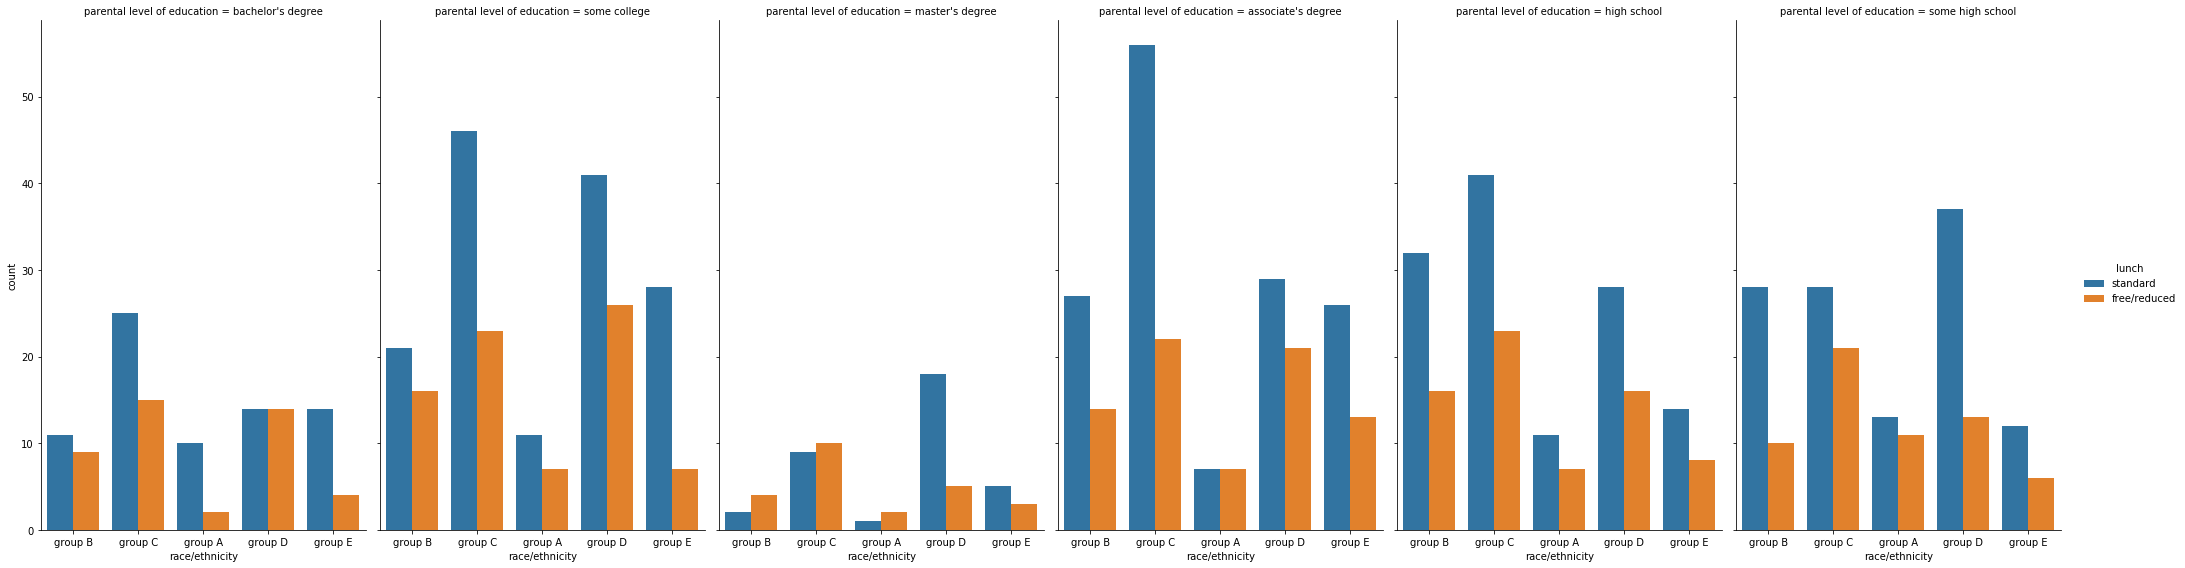

In [408]:
'''
Q 2.2. find out whether parents level_of_education influences lunch_type of their children
'''
#Vizualize it based on parents education
sns.catplot(x="race/ethnicity", hue="lunch", col="parental level of education",
                data=student_perform, kind="count",
                height=8, aspect=.6, )
grouped=student_perform.groupby(['lunch','parental level of education']).size().reset_index(name='counts')
grouped

In [416]:
#Peform Chi square
Zippedlist = list(zip(student_perform['parental level of education'],student_perform['lunch'])) 
GenderLunch = pd.DataFrame(Zippedlist,columns=['parental level of education','lunch'])
GenderLunchPivot = GenderLunch .reset_index().groupby(['parental level of education','lunch']).count().reset_index()
GenderLunchPivot
GenderLunchContigencyTable =GenderLunchPivot.pivot(index='parental level of education', columns='lunch', values='index')
GenderLunchContigencyTable
GenderLunchContigencyTable.fillna(0,inplace = True)
GenderLunchContigencyTable

chi2,p,dof,expected = sps.chi2_contingency(GenderLunchContigencyTable, correction=False)
chi2,p,dof,expected  

'''
We can see that there is no significant correlation between parental level of education and lunch
pval=0.9 > 0.05
'''

(1.1112675079168055, 0.9531014927218224, 5, array([[ 78.81 , 143.19 ],
        [ 41.89 ,  76.11 ],
        [ 69.58 , 126.42 ],
        [ 20.945,  38.055],
        [ 80.23 , 145.77 ],
        [ 63.545, 115.455]]))

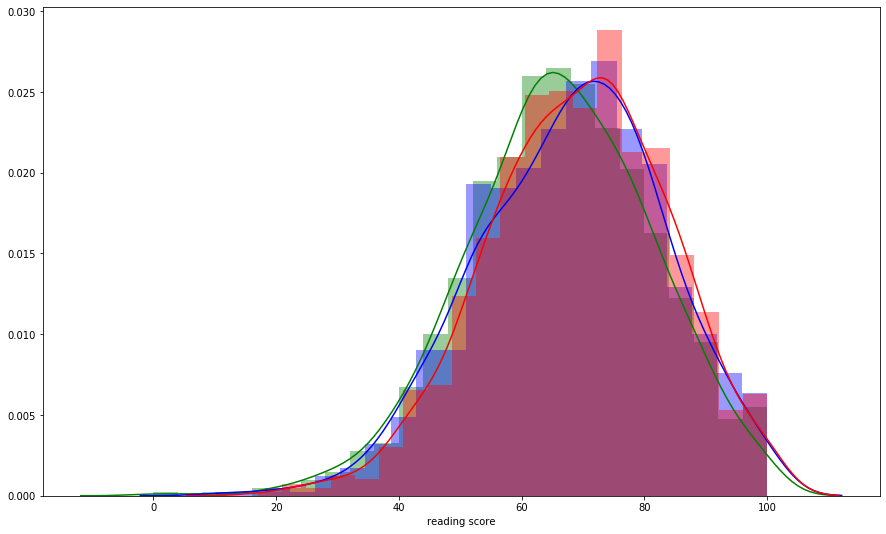

(array([  2.,   6.,  14.,  55., 126., 161., 223., 225., 120.,  68.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

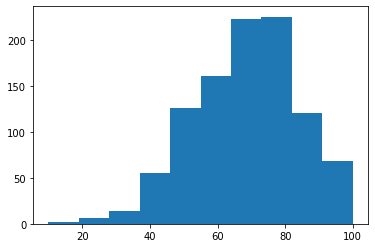

(array([  2.,   2.,  10.,  26.,  95., 188., 268., 216., 135.,  58.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

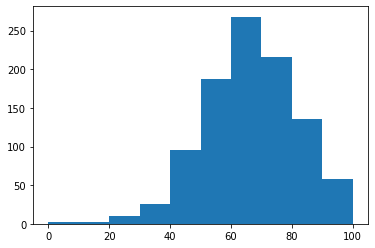

In [ ]:

student_perform.dtypes
student_perform.corr()
sns.heatmap(student_perform.corr())
plt.title('Covariance Plot'

In [ ]:
# Home task: 
# explore whether there are any dependences between reading/writing/math_scores
# and 
# find out whether student's race or/and paretns' level_of_education influences lunch_type of their children
# and 
# attach all proving plots